<a href="https://colab.research.google.com/github/RosalRicardo/tweet-midia/blob/master/Clusteriza%C3%A7%C3%A3o_K_means_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas

In [32]:
import pandas as pd
import numpy as nd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from nltk.corpus import stopwords
from nltk import tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Baixar os dados

In [ ]:
!wget https://raw.githubusercontent.com/LabCidades/tweet-midia/master/dataset_tweets_midia.csv
df= pd.read_csv('dataset_tweets_midia.csv', dtype='unicode')
df_tweets = df[['user.name','full_text']]

train, test = train_test_split(df_tweets,test_size=0.2, random_state = 42)
conjunto_treino = train['full_text'].to_numpy()

--2021-11-10 10:49:01--  https://raw.githubusercontent.com/LabCidades/tweet-midia/master/dataset_tweets_midia.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32500377 (31M) [text/plain]
Saving to: ‘dataset_tweets_midia.csv.2’

dataset_tweets_midi 100%[===================>]  30.99M   151MB/s    in 0.2s    

2021-11-10 10:49:02 (151 MB/s) - ‘dataset_tweets_midia.csv.2’ saved [32500377/32500377]



## Pre-processamento dos dados

> Tokenização e stop words


In [28]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
token_espaco = tokenize.WhitespaceTokenizer()

tweets_processados = list()
for tweet in conjunto_treino:
    novo_tweet = list()
    palavras_tweet = token_espaco.tokenize(tweet)
    for palavra in palavras_tweet:
        if palavra not in palavras_irrelevantes:
            novo_tweet.append(palavra)
    tweets_processados.append(' '.join(novo_tweet))

> Vetorização e criação do bag of words

In [23]:
vetorizar = CountVectorizer(lowercase=False,max_features=1000)
bag_of_words = vetorizar.fit_transform(frase_processada)
bag_of_words.shape

vetorizar.get_feature_names()

(20260, 1000)

> Clusterização dos tweets

In [24]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=2000, n_init=1)
model.fit(bag_of_words)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

> principais termos por cluster

In [27]:
print("Principais termos por cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
termos = vetorizar.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % termos[ind])
    print

Principais termos por cluster:
Cluster 0:
 RT
 pra
 Bolsonaro
 Brasil
 sobre
 Não
 dia
 ser
 vai
 CPIdaCovid
Cluster 1:
 São
 Paulo
 https
 co
 periferias
 Grande
 cidade
 zona
 sobre
 19
Cluster 2:
 co
 https
 sobre
 Brasil
 pra
 dia
 Bolsonaro
 gente
 hoje
 anos
Cluster 3:
 RT
 https
 co
 criolomc
 agmural
 CLEANE
 via
 sobre
 Brasil
 coabitar
Cluster 4:
 co
 https
 São
 Paulo
 Foto
 GuiaDeEmpregoDasPeriferias
 zona
 sobre
 atuar
 SP


In [38]:
todas_palavras = ' '.join([tweet for tweet in tweets_processados])

nuvem_palvras = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(todas_palavras)

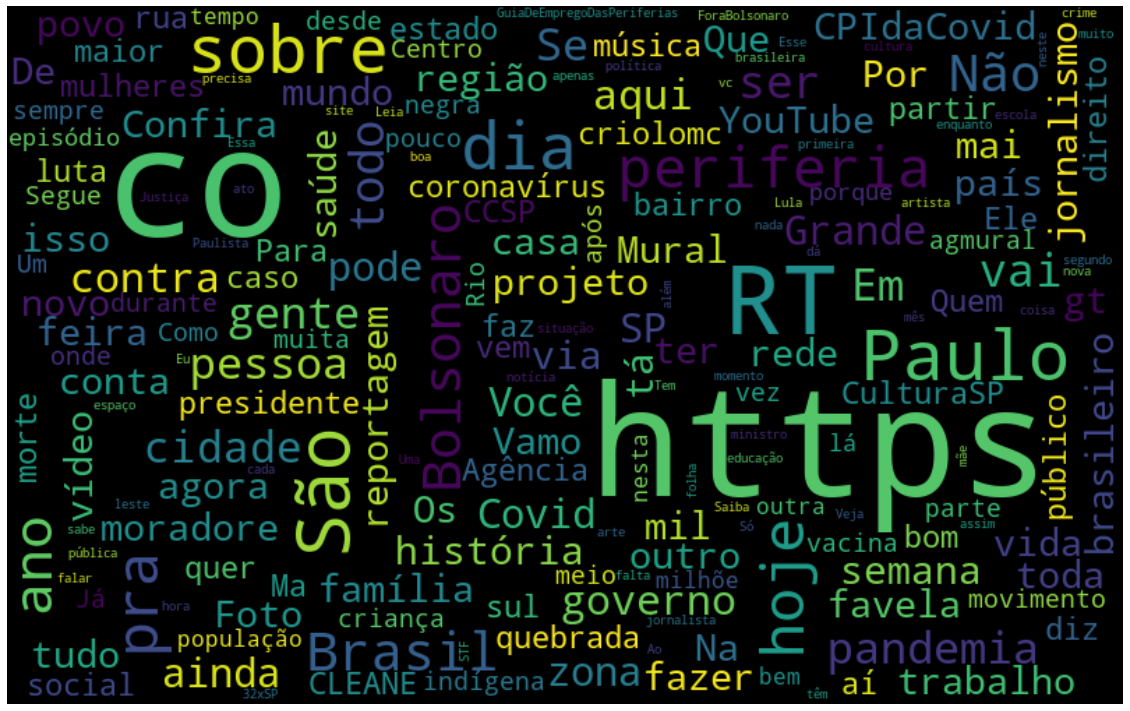

In [39]:
plt.figure(figsize=(20,14))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()